### Surprise Housing, a US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

###     Given, the company is looking at prospective properties to buy to enter the Australian market, we  Surprise Housing, a US-based housing company has decided to enter the Australian market. The  company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

###     Given, the company is looking at prospective properties to buy to enter the Australian market, we are going to build a regression model using regularization to predict the actual value of the prospective properties so that the company can use our model to decide whether it would be profitable to invest in them or not. 

### We will approach the given problem as per the steps below for our Analysis & Investigations. 

### 1.Data Exploration and Cleaning 

### 2.Uni, Bi and Multi-Variate analysis 

### 3.Prepare set of viable features 

### 4.Build a Model and tune it with Regularization Methods 

### 5.Present the Final Model  

 

#### ****** Necessary Imports ******

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Maximizing display options for better viewing
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#Reading the dataset
df= pd.read_csv('train.csv')

In [4]:
#Dataset structure and contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking for columns that have Null values and the magnitude of the same per column. Columns with more than 80% of the data as null will be eliminated as they will not. be of any use to us. 

In [5]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
# Checking for columns with Null Values more than 80%
col_Null_80=[]
for col in df.columns:
    if round((df[col].isna().sum()/len(df.index))*100,2) >=80:
        col_Null_80.append(col)

In [7]:
# Deleting above columns
df= df.drop(df[col_Null_80], axis=1)

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### In case of LotFrontage since most datapoints are clustered around a range, replacing with mean is the best approach

In [9]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

#### Many fields like Fireplace, Garrage , Basement have null values because these properties dont have fireplaces, garrage or basement. We will map them as none

In [10]:
#filling null with None
df['FireplaceQu']=df['FireplaceQu'].fillna('none')

In [11]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}
df['FireplaceQu'] = df['FireplaceQu'].map(mapping)

#### Filling Null values with none as NA values mean no basement

In [12]:
Bas_Col=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']

for col in Bas_Col:
    if df[col].isna().sum()>0:
        df[col]=df[col].fillna('none')
    

In [13]:
df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


#### Filling Null values with none as NA values mean no Garrage

In [14]:
Gar_Col=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

for col in Gar_Col:
    if df[col].isna().sum()>0:
        df[col]=df[col].fillna('none')

In [15]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#### The remaining columns have very minimal null values, hence removing the records

In [16]:
columns_with_nulls = df.columns[df.isna().any()].tolist()

In [17]:
columns_with_nulls

['MasVnrType', 'MasVnrArea', 'Electrical']

In [18]:
for col in columns_with_nulls:
    df=df[~df[col].isna()]

#### All Null values have been taken care of

In [19]:
df.isna().sum().sum()

0

#### Verifying Caategorical columns and converting to numerical where possible

#### Basement Columns

In [20]:
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df['BsmtCond'] = df['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})

In [21]:
df.BsmtExposure=df.BsmtExposure.map({'Gd':5,'Av':4,'Mn':3,'No':2,'none':0})
df.BsmtFinType1=df.BsmtFinType1.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'none':0})
df.BsmtFinType2=df.BsmtFinType2.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'none':0})


#### Garrage Columns

In [22]:
df.GarageType=df.GarageType.map({'2Types':6,'Attchd':5,'Basment':4,'BuiltIn':3,'CarPort':2,'Detchd':1,'none':0})
df.GarageFinish=df.GarageFinish.map({'Fin':3,'RFn':2,'Unf':1,'none':0})
df.GarageQual=df.GarageQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df.GarageCond=df.GarageCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})

#### Other Columns that can be converted into meaningfull numerical columns

In [23]:
df.Street=df.Street.map({'Grvl':0,'Pave':1})
df.LotShape=df.LotShape.map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df.LandContour=df.LandContour.map({'Lvl':3,'Bnk':2,'HLS':1,'Low':0})
df.Utilities=df.Utilities.map({'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0})
df.LotConfig=df.LotConfig.map({'FR3':4,'FR2':3,'CulDSac':2,'Corner':1,'Inside':0})
df.LandSlope=df.LandSlope.map({'Gtl':2,'Mod':1,'Sev':0})
df.Condition1=df.Condition1.map({'Artery':8,'Feedr':7,'Norm':6,'RRNn':5,'RRAn':4,'PosN':3,'PosA':2,'RRNe':1,'RRAe':0})
df.Condition2=df.Condition2.map({'Artery':8,'Feedr':7,'Norm':6,'RRNn':5,'RRAn':4,'PosN':3,'PosA':2,'RRNe':1,'RRAe':0})
#df.BldgType=df.BldgType.map({'1Fam':0,'Single':1,'2FmCon':2,'Duplx':3,'TwnhsE':4,'TwnhsI':5})
df.KitchenQual=df.KitchenQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
df.Functional=df.Functional.map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
df.PavedDrive=df.PavedDrive.map({'Y':2,'P':1,'N':0})

#### Verifying for Null Values after all the mapping activities

In [24]:
df.isna().sum().sum()   

0

#### Will drop Garage year built,  as we will have the overall property age from Year Sold and Year Built, post which will be dropping them as well

In [25]:
# df=df.drop('GarageYrBlt',axis=1)

In [26]:
df['PropAge']=df['YrSold']-df['YearBuilt']

In [27]:
df.PropAge.describe()

count    1451.000000
mean       36.722950
std        30.238849
min         0.000000
25%         8.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: PropAge, dtype: float64

In [28]:
# df=df.drop(['YrSold', 'YearBuilt','YearRemodAdd'], axis=1)

In [29]:
# df=df.drop('MoSold',axis=1)

#### Checking the Numerical features on their spread adjusting for outliers

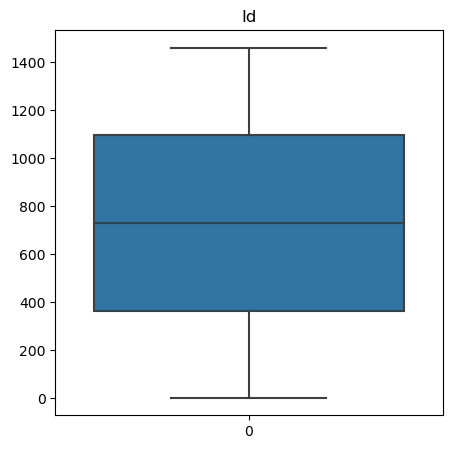

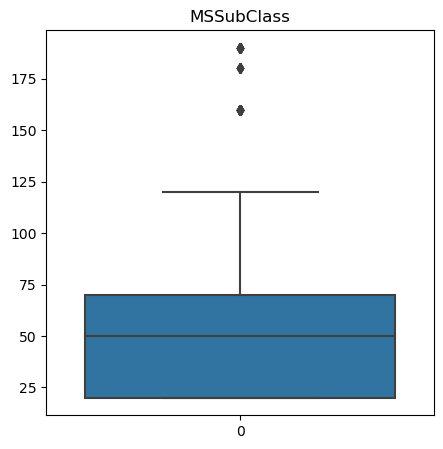

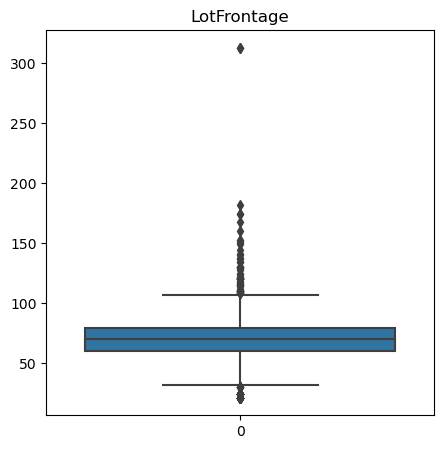

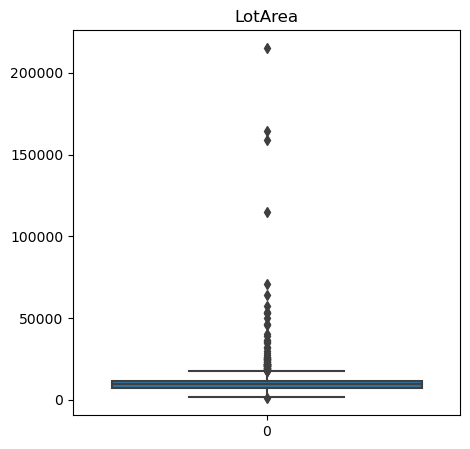

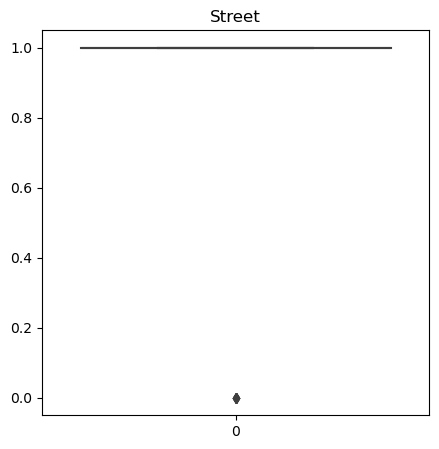

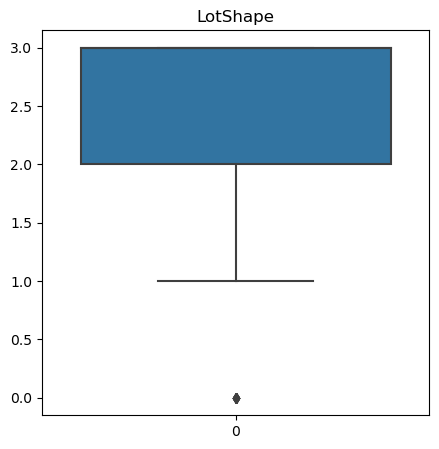

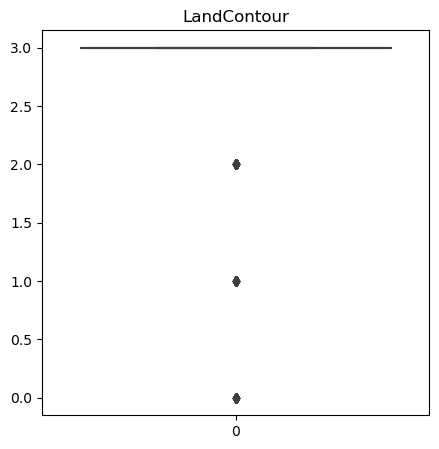

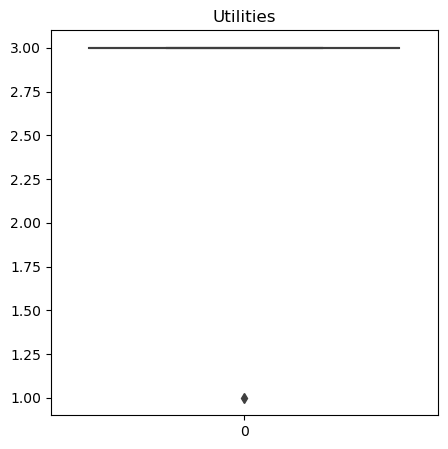

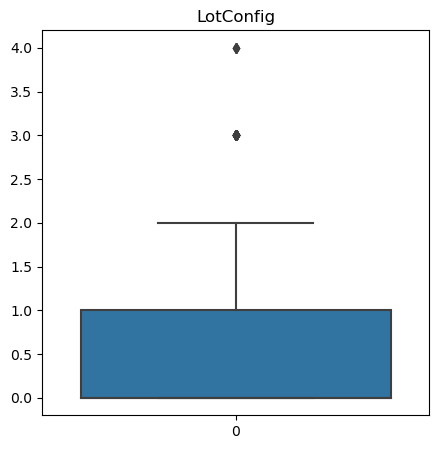

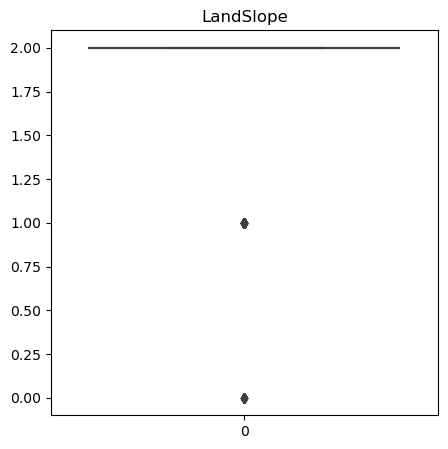

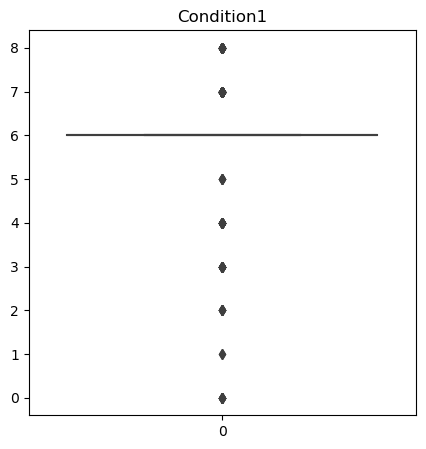

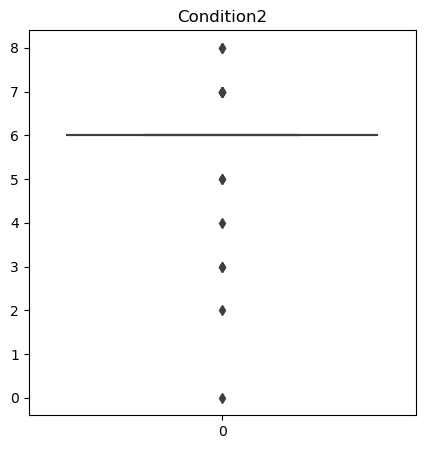

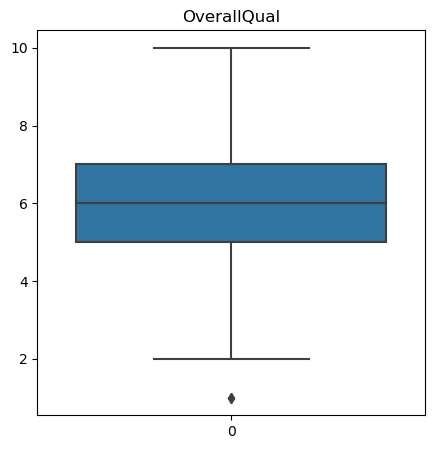

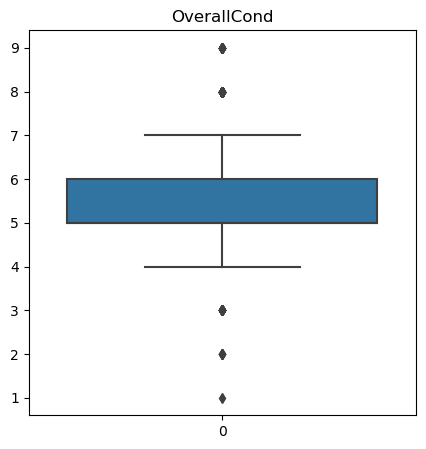

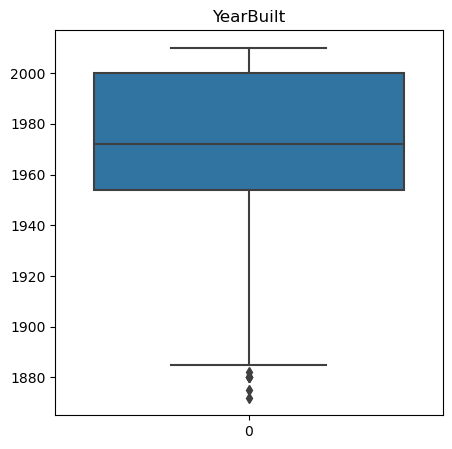

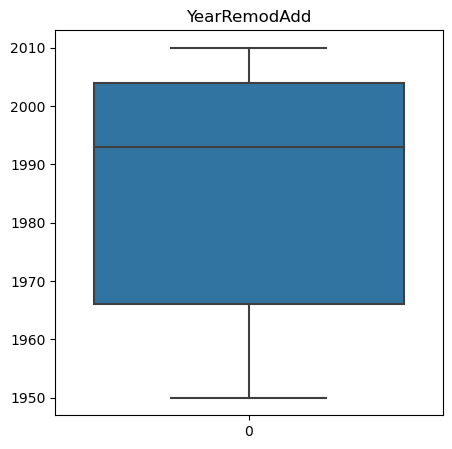

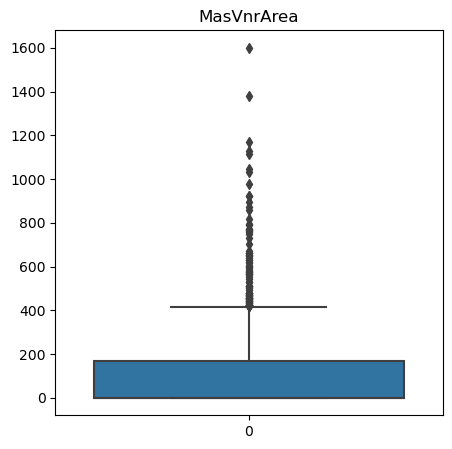

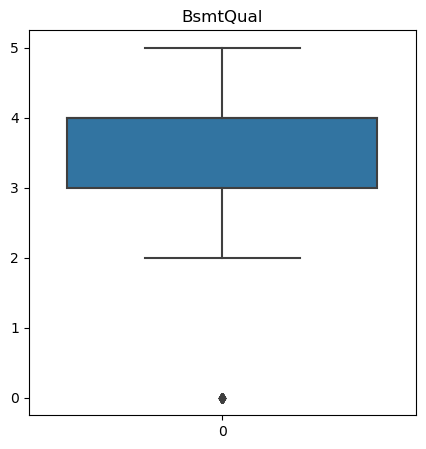

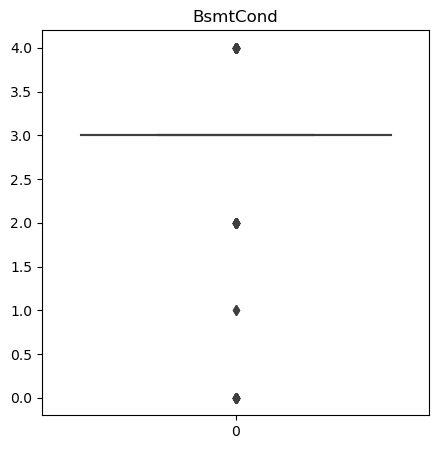

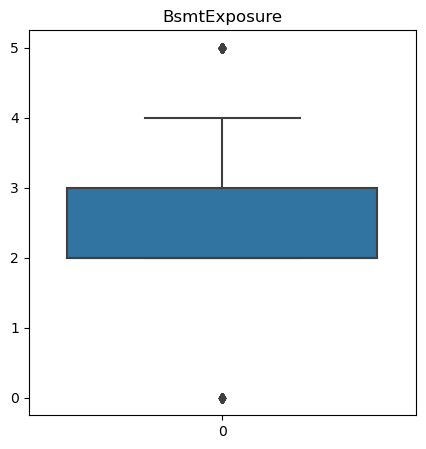

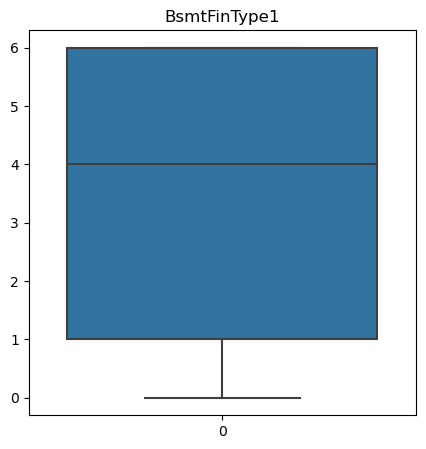

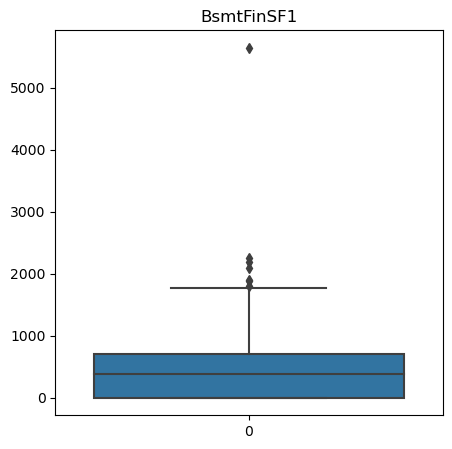

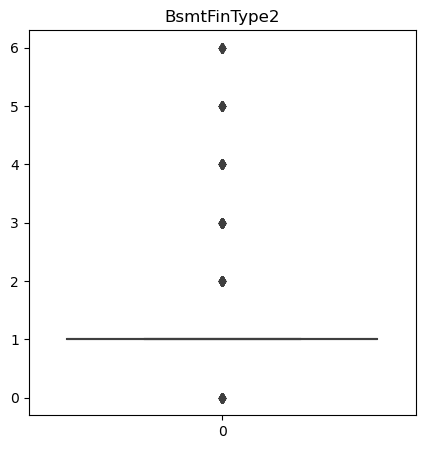

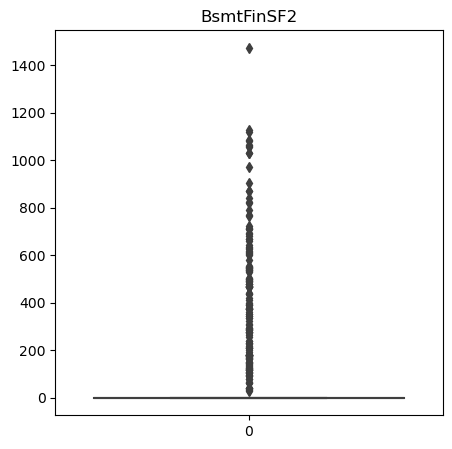

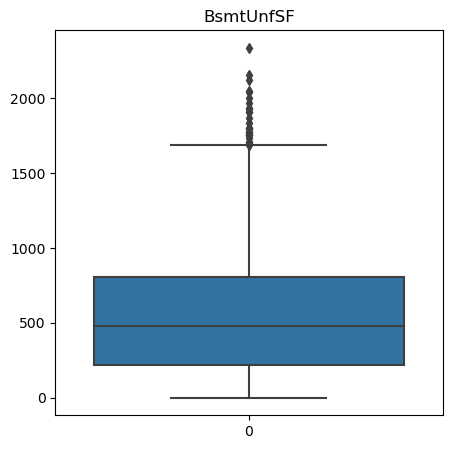

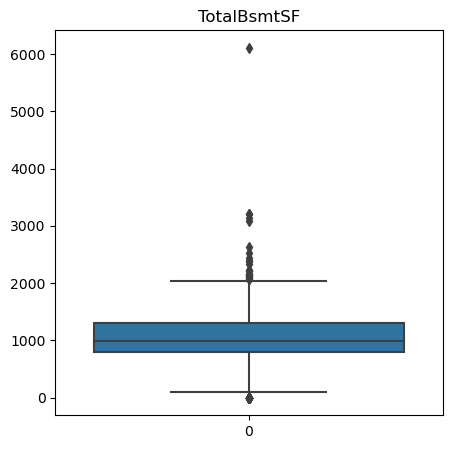

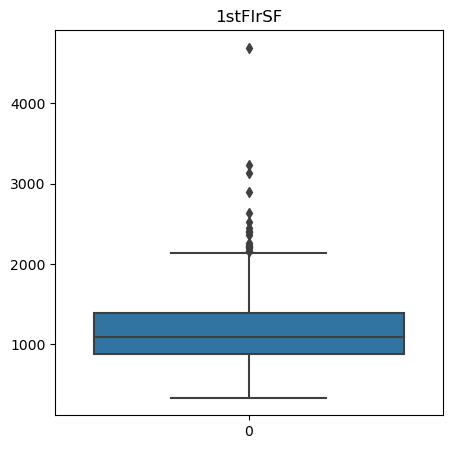

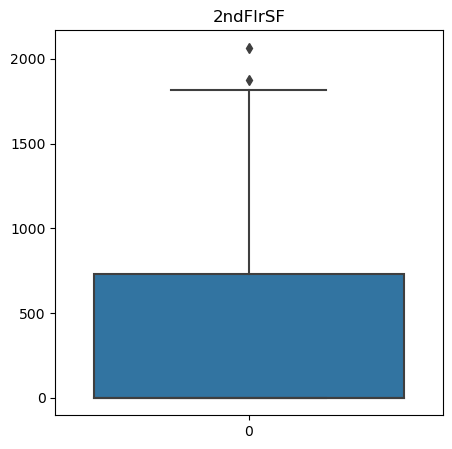

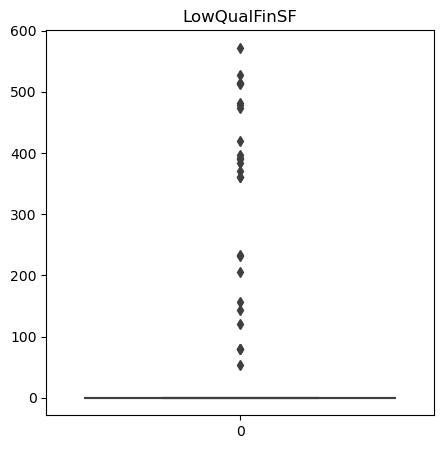

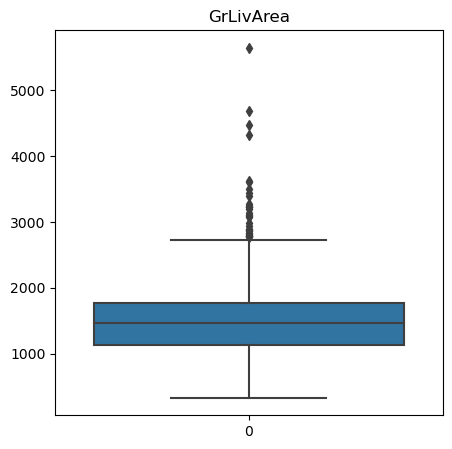

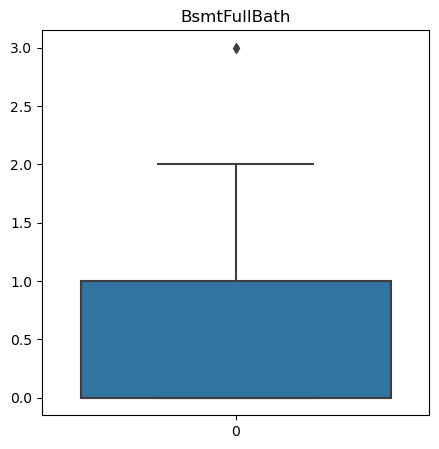

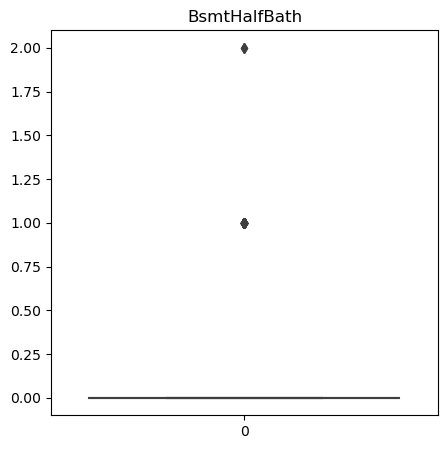

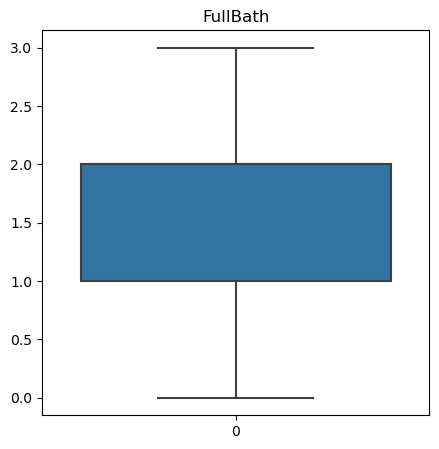

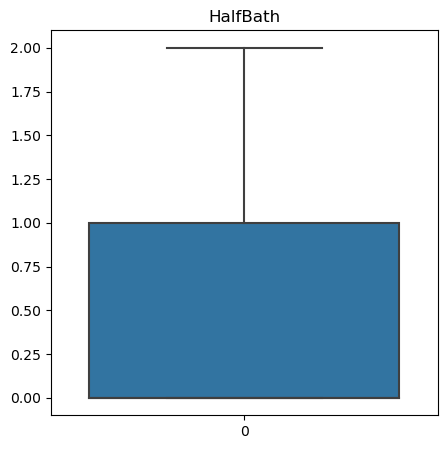

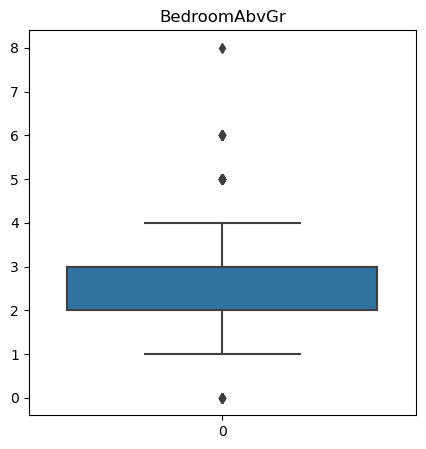

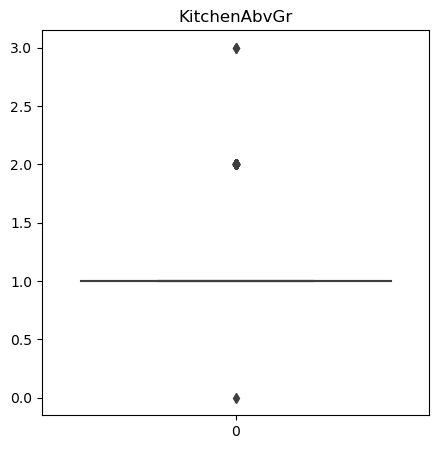

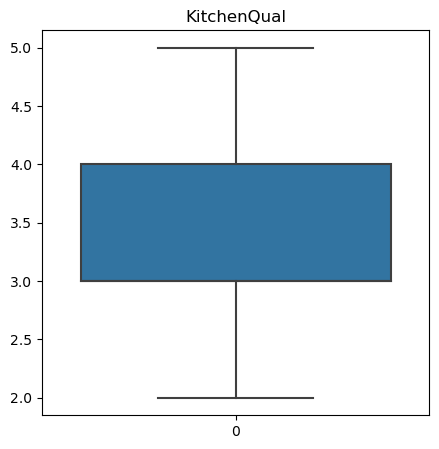

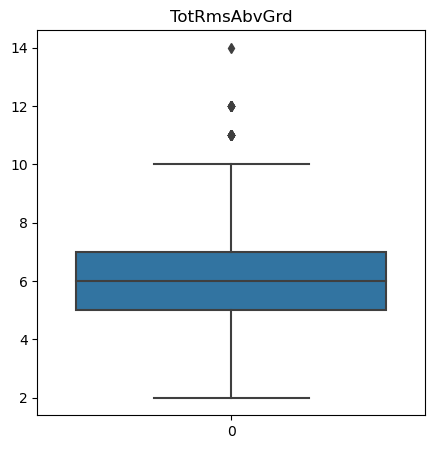

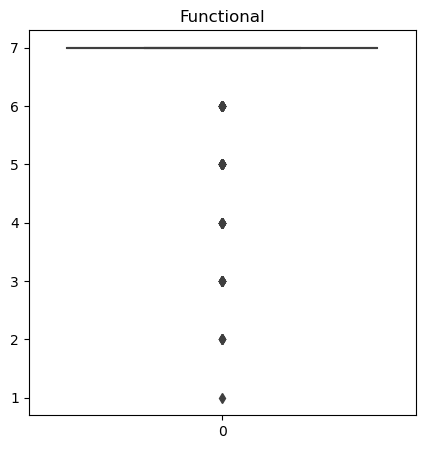

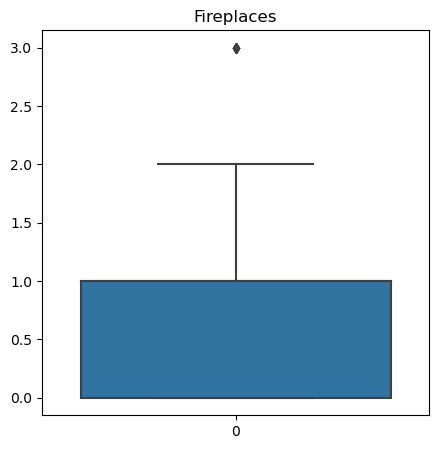

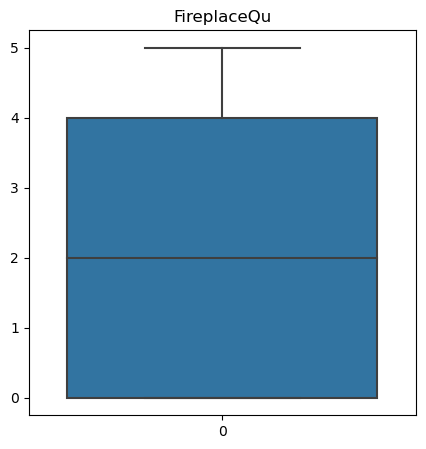

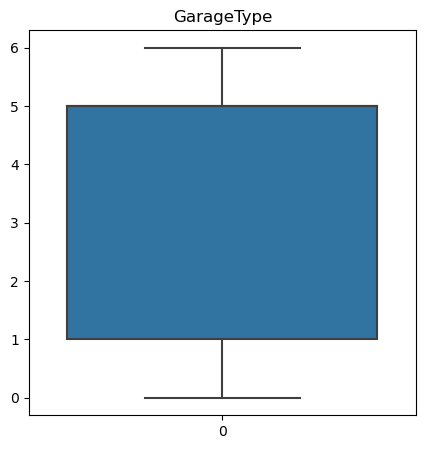

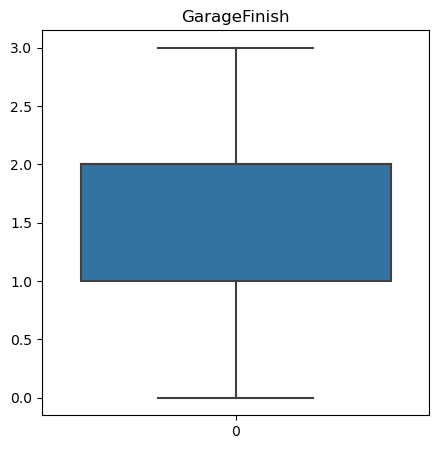

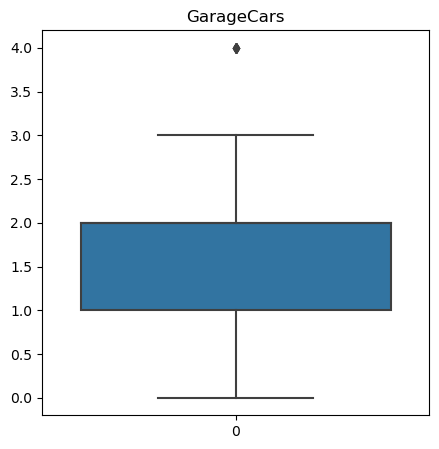

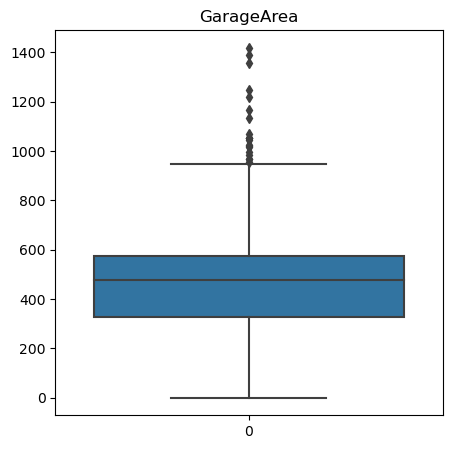

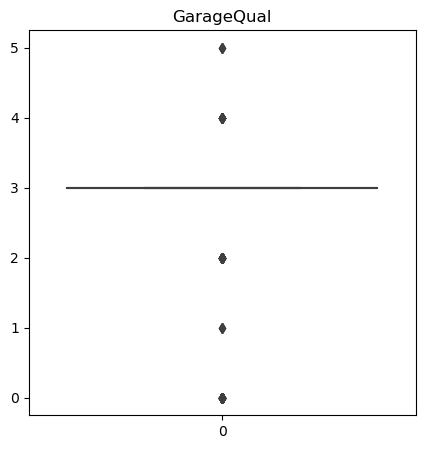

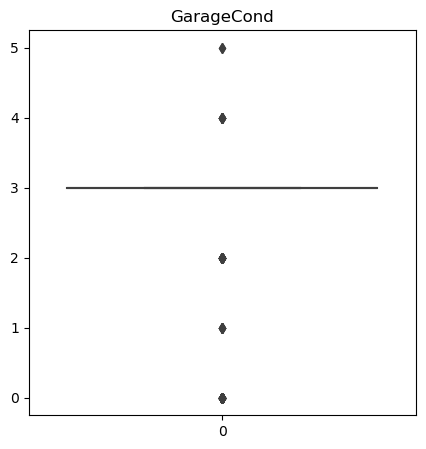

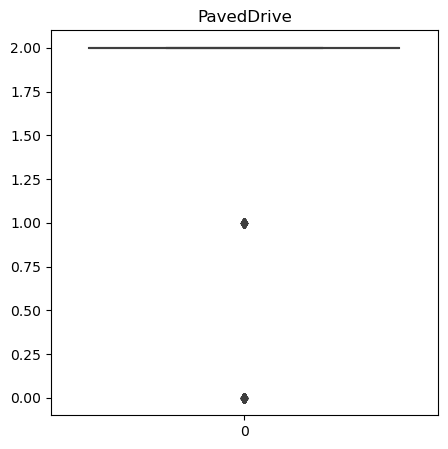

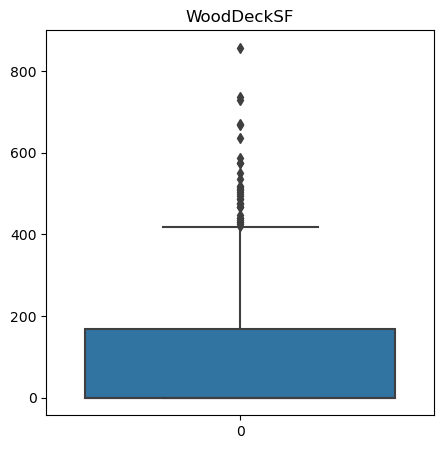

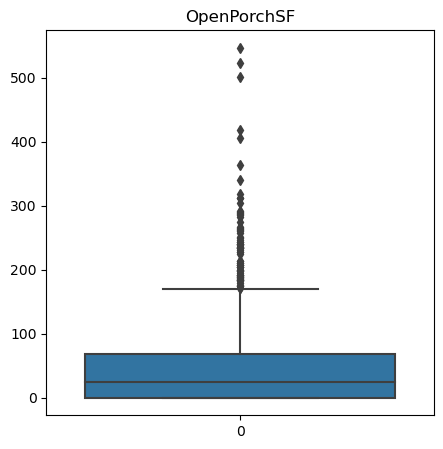

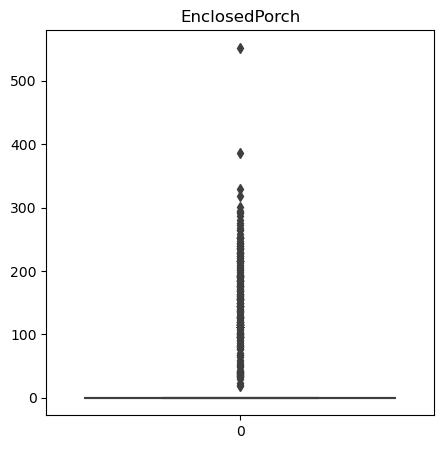

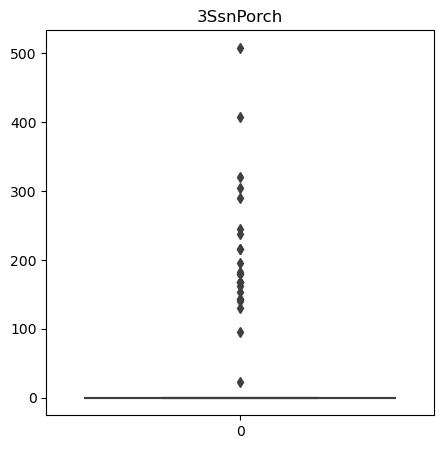

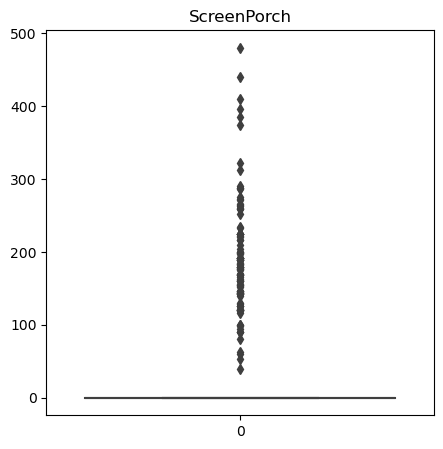

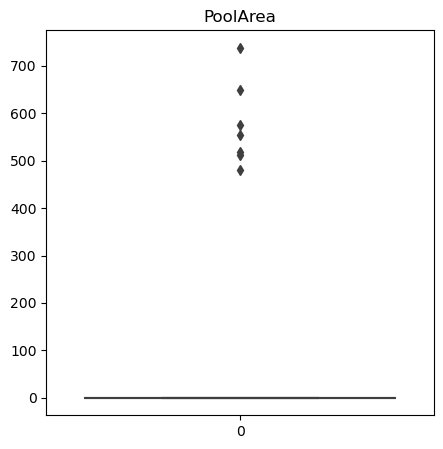

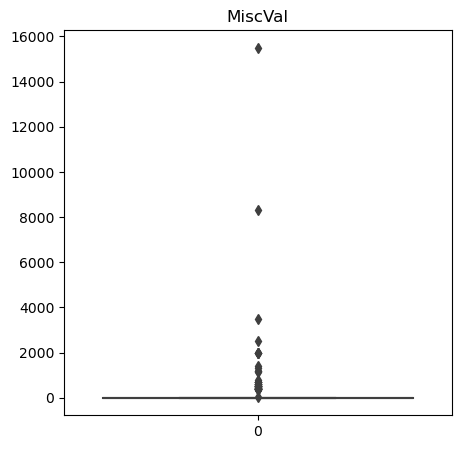

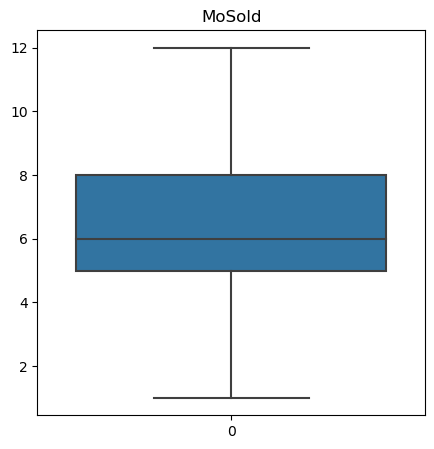

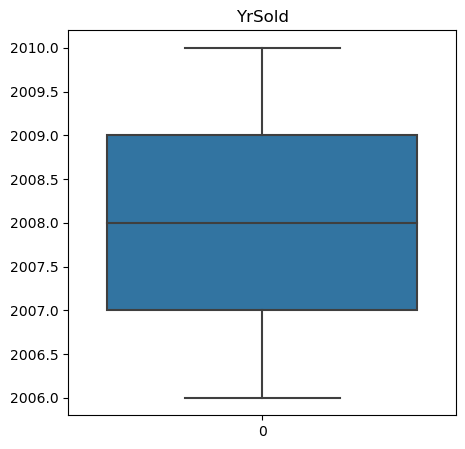

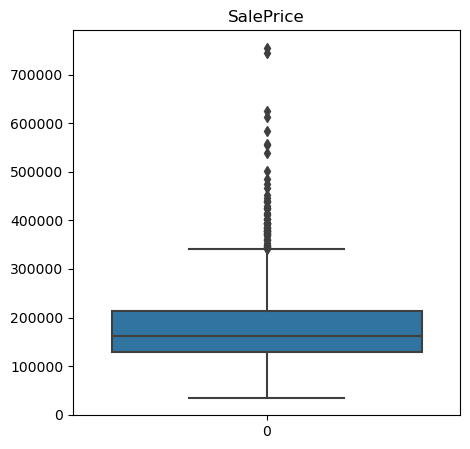

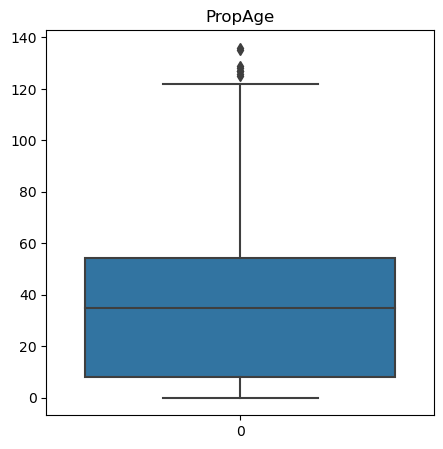

In [30]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns

for col in df[num_col]:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

#### Verifying Distribution or categorical columns

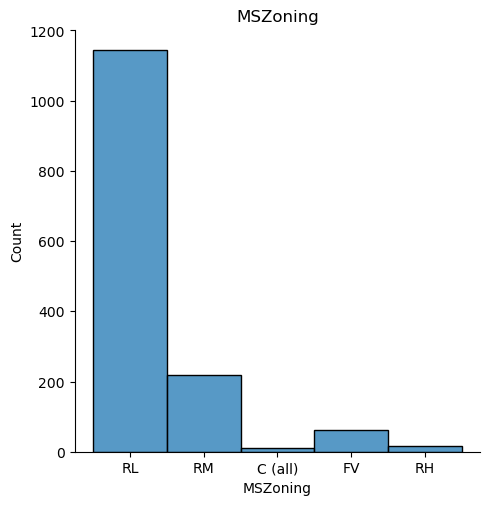

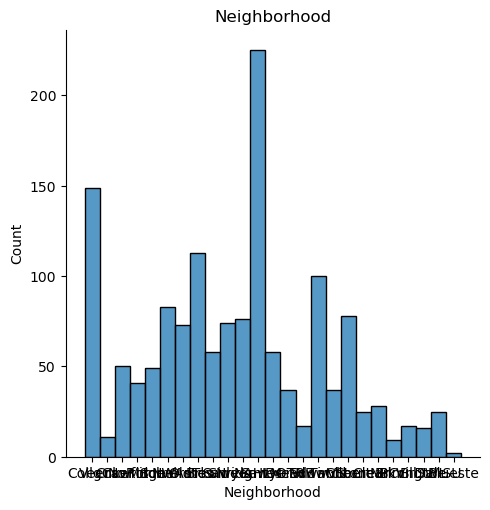

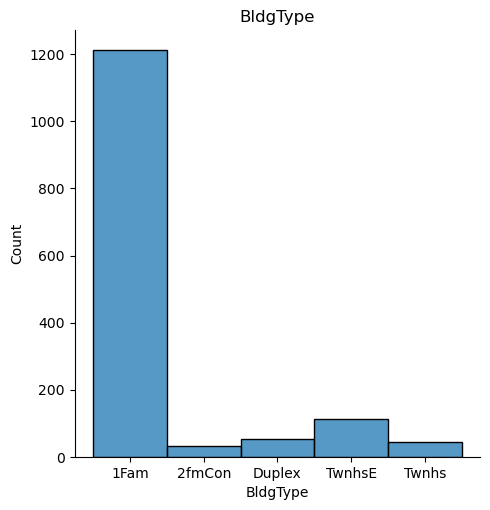

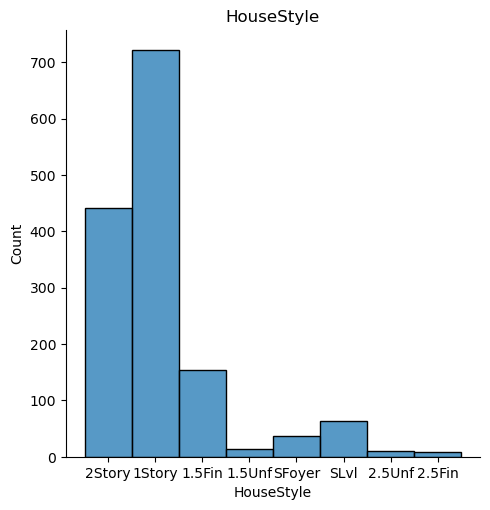

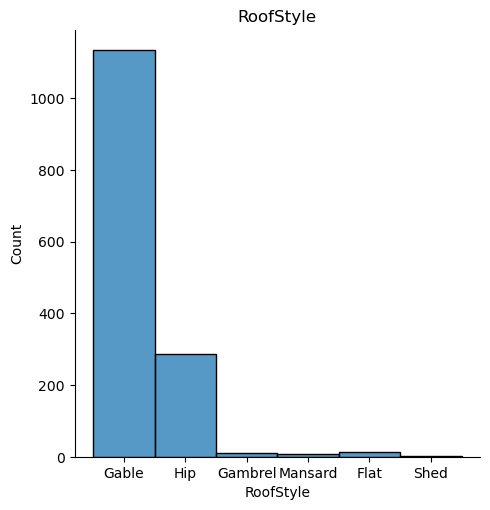

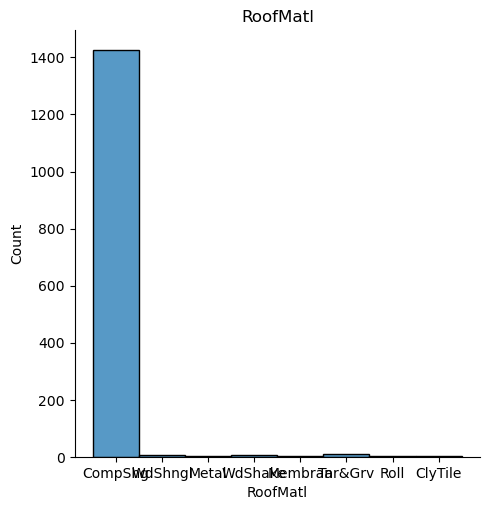

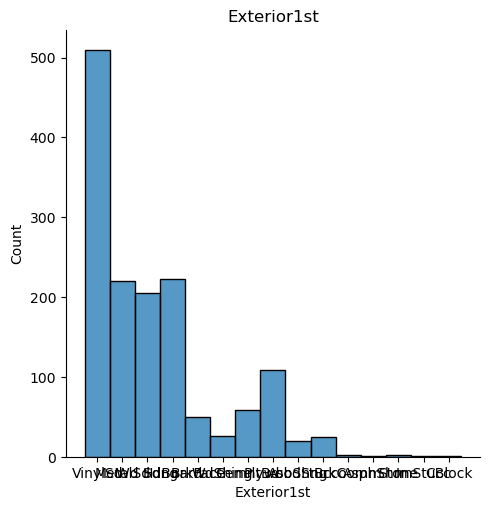

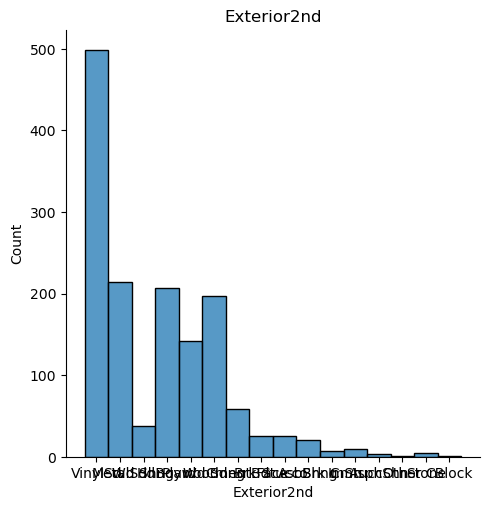

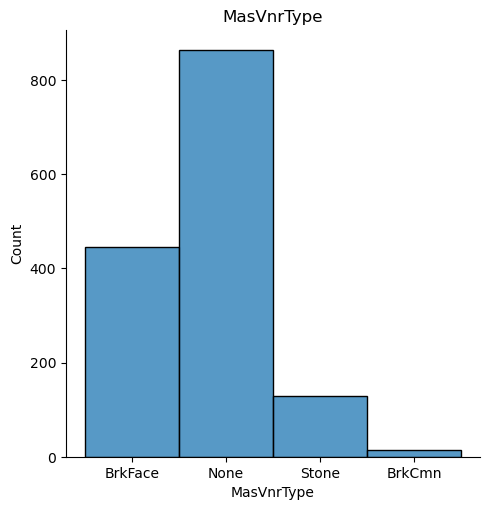

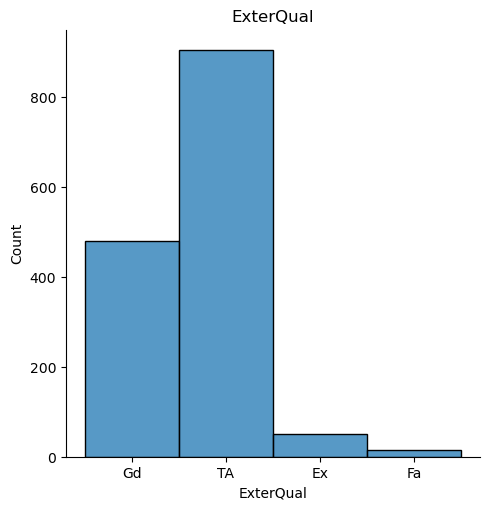

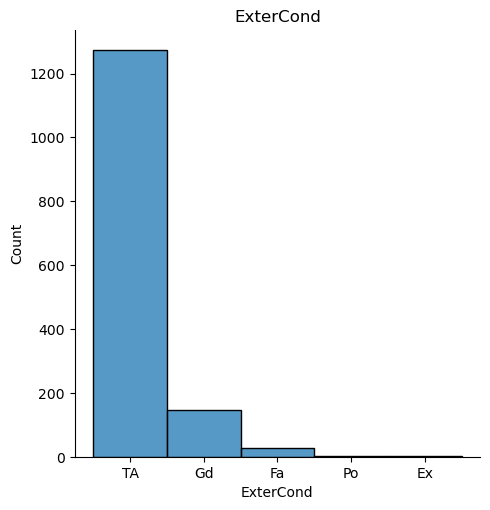

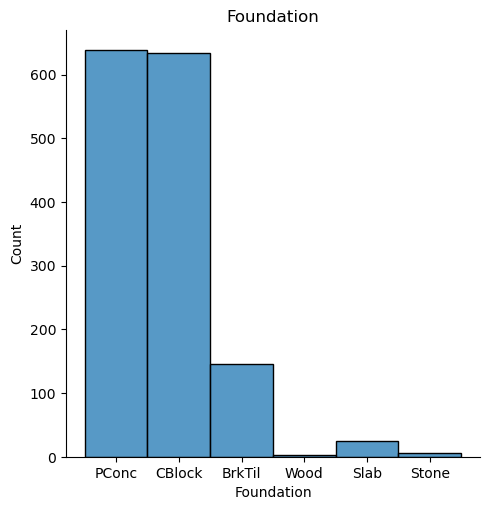

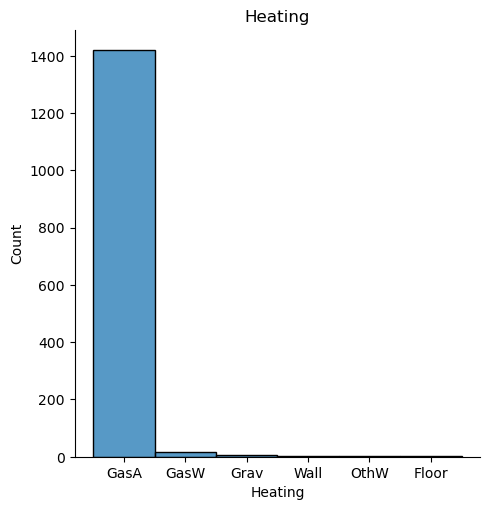

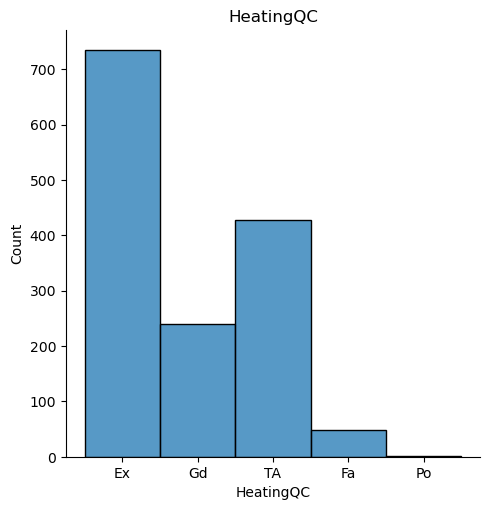

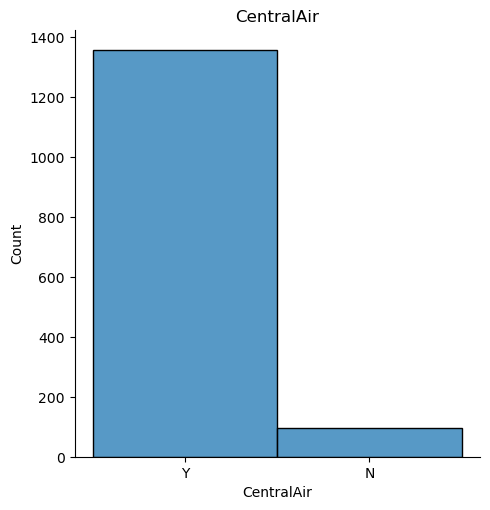

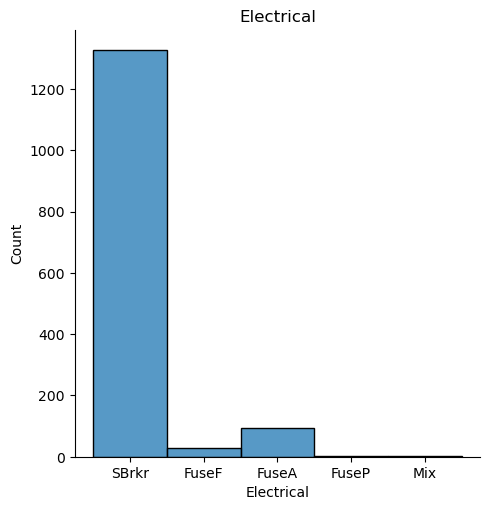

ValueError: Unable to parse string "none" at position 39

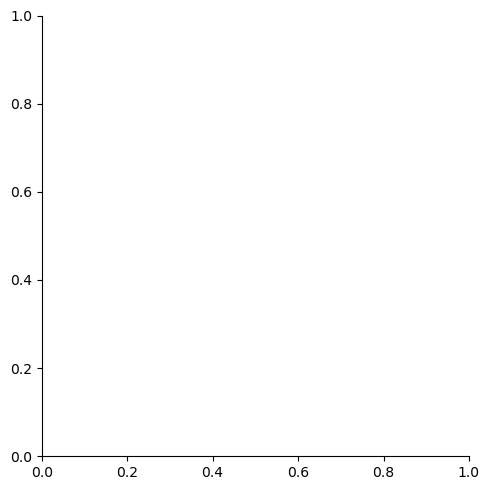

In [31]:
obj_col = df.select_dtypes(include=[object]).columns

for col in obj_col:
    sns.displot(data=df,x=col)
    plt.title(col)
    plt.show()

#### Creating a Pairplot to check the relation of the features with the Target

In [ ]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

#### Based on the above analysis, we can remove below Features as they either have very low correlation with Target, or any 1 value of the feature constitue more than 80% of its values

'PoolArea','MiscVal','3SsnPorch','PavedDrive','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','CentralAir','Heating','RoofMatl','BldgType','Condition2','Utilities','Street'

In [ ]:
# col_drop=['PoolArea','MiscVal','3SsnPorch','PavedDrive','KitchenAbvGr','BsmtHalfBath','LowQualFinSF','CentralAir','Heating','RoofMatl','BldgType','Condition2','Utilities','Street']
# df=df.drop(col_drop, axis=1)

In [ ]:
df.info()

#### Calculating the correlation with Target

In [ ]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
round(correlation_with_target*100,2)

#### Plotting into a heatmap

In [ ]:
plt.figure(figsize=(30,20))
cor=df.corr()
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
#Deleting ID column
df=df.drop('Id', axis=1)

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
obj_col = df.select_dtypes(include=[object]).columns

In [ ]:
df[obj_col].info()

In [ ]:
df[num_col].info()

#### Removing outliers from all numerical Features by shaving off the top and bottom by 5%

In [ ]:
for col in num_col:
    df[col][df[col] <= df[col].quantile(0.05)] = df[col].quantile(0.05)
    df[col][df[col] >= df[col].quantile(0.95)] = df[col].quantile(0.95)

#### Scaling Numerical Data

In [ ]:
# Scaling the data between 0 and 1
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df[num_col])

#### Creating Dummy variables for categorical data

In [ ]:
# convert into dummies - one hot encoding
df_dummies = pd.get_dummies(df[obj_col], drop_first=True)
df_dummies.head()

In [ ]:
df=df.drop(obj_col, axis=1)

#### Identifying and deleting columns that have sum less than 50. 

In [ ]:
# cols=df_dummies.columns

In [ ]:
# ones_count=0
# delCol=[]
# for col in cols:
#     ones_count = df_dummies[col].sum()
#     if ones_count<50:
#         delCol.append(col)

In [ ]:
# delCol

In [ ]:
# df_dummies=df_dummies.drop(delCol,axis=1)

#### Concatenating the Dummy Variables with the actual Dataframe

In [ ]:
df= pd.concat([df,df_dummies], axis=1)

In [ ]:
df.shape

#### Plotting to view the effect on Target after Data Processing

In [ ]:
sns.set(style="ticks")

# Define the number of columns to display in each row (e.g., 3)
columns_per_row = 3

# Iterate through columns in groups of 3
for i in range(0, len(df.columns[:-1]), columns_per_row):
    start_col = i
    end_col = min(i + columns_per_row, len(df.columns[:-1]))
    
    # Select the columns to display in this row
    selected_columns = df.columns[start_col:end_col]

    # Create a pairplot for the selected columns
    sns.pairplot(df, x_vars=selected_columns, y_vars=['SalePrice'], height=4, aspect=1.2)
    plt.show()

#### Analyzing the Target 

In [ ]:
sns.displot(df.SalePrice, kde=True, label='Sales')
plt.legend()
plt.show()

#### There is a Right Skew on the Target distribution. Taking the Natural Log to normalize the Target's Distribution

In [ ]:
df.SalePrice=np.log(df.SalePrice)

In [ ]:
sns.displot(df.SalePrice, kde=True, label='Sales')
plt.legend()
plt.show()

#### Checking correraltion again to try and reduce weakly correlated features

In [ ]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
dict1=round(correlation_with_target*100,2)
print(len(dict1))
print(dict1)

In [ ]:
# selected_ids = []

# for feature, correlation in dict1.items():
#     if -5 <= correlation <= 5:
#         selected_ids.append(feature)

# # print(selected_ids)

#### Reducing features that have low correlation with target to simplify the model

In [ ]:
# df=df.drop(selected_ids,axis=1)

### Creating X and y variables

In [ ]:
#Separating SalePrice and assigning y to it
y= df.pop('SalePrice')
#Assigning X to Features
X=df

### Ceating Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

### Model Creation

### Linear Regression

In [ ]:
# Instantiate
lm = LinearRegression()

In [ ]:
# Fit a line
lm.fit(X_train, y_train)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:

    y_pred_train = lm.predict(X_train)
    y_pred_test = lm.predict(X_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print(r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print(rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print(mse_test_lr)
    metric.append(mse_test_lr**0.5)

### We can see a good fit with R-Squared score of 92.6 of Train and 90.9 on Test

### Ridge

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
print(model_cv.best_params_)

In [ ]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

### We see a good fit with Ridge model with R-squared on the Train at 93.38 and Test at 90.87

### Lasso

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

In [ ]:
model_cv_result_df=pd.DataFrame(model_cv.cv_results_)

In [ ]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

In [ ]:
lasso.coef_

In [ ]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

### We see a good fit with Lasso model with R-squared on the Train at 92.2 and Test at 90.85

In [ ]:
beta = pd.DataFrame(index=X_train.columns)
beta.rows = X_train.columns
beta

In [ ]:
beta['Ridge'] = ridge.coef_
beta['Lasso'] = lasso.coef_

In [ ]:
beta

In [ ]:
beta[beta['Lasso']==0]

In [ ]:
beta.loc[beta['Lasso']!=0, 'Lasso']

In [ ]:
plt.plot(model_cv_result_df['param_alpha'], model_cv_result_df['mean_train_score'], label='Train')
plt.plot(model_cv_result_df['param_alpha'], model_cv_result_df['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

#### We have a final model with a good fit

In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

In [ ]:
betas = pd.DataFrame(index=X.columns)

In [ ]:
betas.rows = X.columns

In [ ]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [ ]:
betas.head(15)